In [232]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Visiualization

In [233]:
"""
1. Data Import
2. Basic Statistic Summary
3. Numerical features exploration
4. Categorical features exploration
5. Missing Data Visualization
"""

'\n1. Data Import\n2. Basic Statistic Summary\n3. Numerical features exploration\n4. Categorical features exploration\n5. Missing Data Visualization\n'

In [234]:
# reading the dataset
data = pd.read_csv('./online_shoppers_intention.csv')
# checking the shape of the data
data.shape

(12330, 18)

In [235]:
# Summarize numerial features
data[data.columns[:9]].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742


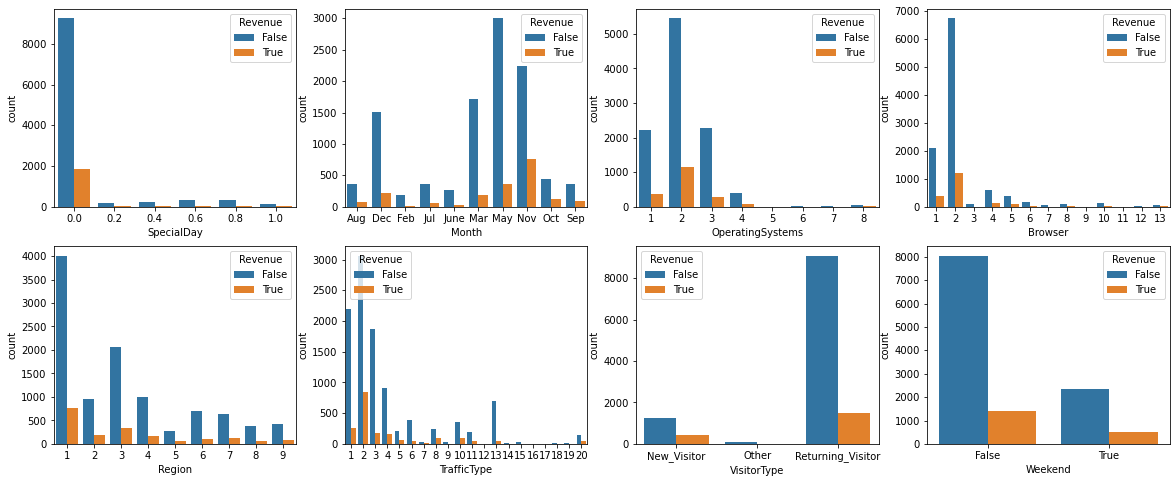

In [236]:
# Summarize categorical features
cat_features = ['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for idx, cat in enumerate(cat_features):
    stat_by_cat = data.groupby(by = [cat,'Revenue']).agg(count =('Revenue', 'count')).reset_index()
    sns.barplot(ax = axes[idx//4, idx % 4], x = cat, y = 'count', hue='Revenue', data=stat_by_cat)

C:\Users\elinw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\elinw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\elinw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Revenue')

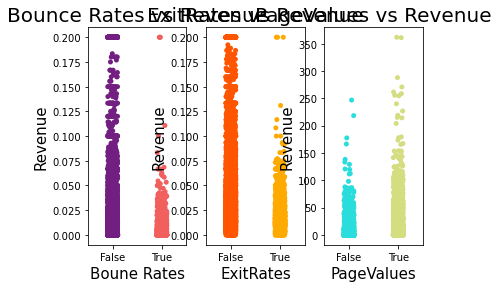

In [237]:
# Quantitative measures VS target

# bounce rates vs revenue
plt.subplot(1, 3, 1)
sns.stripplot(data['Revenue'], data['BounceRates'], palette = 'magma')
plt.title('Bounce Rates vs Revenue', fontsize = 20)
plt.xlabel('Boune Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# Exit rates vs revenue
plt.subplot(1, 3, 2)
sns.stripplot(data['Revenue'], data['ExitRates'], palette = 'autumn')
plt.title('ExitRates vs Revenue', fontsize = 20)
plt.xlabel('ExitRates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# Page values vs revenue
plt.subplot(1, 3, 3)
sns.stripplot(data['Revenue'], data['PageValues'], palette = 'rainbow')
plt.title('PageValues vs Revenue', fontsize = 20)
plt.xlabel('PageValues', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

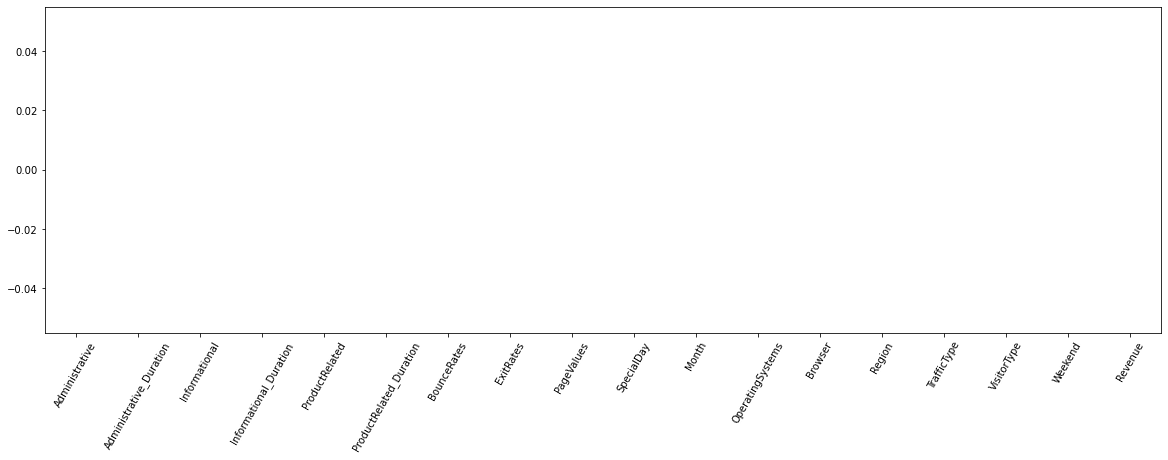

In [238]:
# Plot the percentages of missing data
data_missing_perc = data.isnull().sum()/data.shape[0]
fit = plt.figure(figsize = (20,6))
ax = sns.barplot(x = data_missing_perc.index, y = data_missing_perc.values)
ax.tick_params(axis = 'x', rotation=60)

# 2. Data Cleaning

In [239]:
"""
1. Missing Data (Impute / delete)
2. Standardize?
3. Outliers?
4. Data Split
"""

'\n1. Missing Data (Impute / delete)\n2. Standardize?\n3. Outliers?\n4. Data Split\n'

In [240]:
# Missing Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [241]:
# Impute the missing values with mean
# Since the percentage of missing values is low, we impute the missing values with mean.
from sklearn.impute import SimpleImputer

columns = []
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
for col in columns:
    imputed_col = imp_mean.fit_transform(np.array(data[col]).reshape(-1,1))
    data.drop([col], axis=1)
    data[col] = imputed_col
    
# To confirm no missing values left (i.e., sum should be 0)
data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [242]:
# Split dataset into development and test datasets.

print(data['Revenue'].value_counts()/len(data))

# Since the dataset is imbalanced, we use stratified dataset split.
from sklearn.model_selection import train_test_split

y = data['Revenue']
X = data.drop(['Revenue'], axis=1)

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0) 

False    0.845255
True     0.154745
Name: Revenue, dtype: float64


In [243]:
y_dev.value_counts()/len(y_dev)

False    0.845296
True     0.154704
Name: Revenue, dtype: float64

In [244]:
y_test.value_counts()/len(y_test)

False    0.845093
True     0.154907
Name: Revenue, dtype: float64

In [245]:
# Apply Standard Scaling to numerical features
X_dev_num = X_dev[X_dev.columns[:9]]
X_test_num = X_test[X_dev.columns[:9]]

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_dev_num_scaled = ss.fit_transform(X_dev_num)
X_test_num_scaled = ss.transform(X_test_num)

X_dev_scaled = pd.concat([pd.DataFrame(X_dev_num_scaled, columns=X_dev_num.columns), X_dev[X_dev.columns[9:]]], axis=1)
X_test_scaled = pd.concat([pd.DataFrame(X_test_num_scaled, columns=X_test_num.columns), X_test[X_dev.columns[9:]]], axis=1)

In [246]:
print(X_dev_scaled.shape)
print(X_test_scaled.shape)

(11844, 17)
(4456, 17)


In [247]:
X_dev_scaled[X_dev_scaled.columns[:9]].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
count,9.864000e+03,9.864000e+03,9.864000e+03,9.864000e+03,9.864000e+03,9.864000e+03,9.864000e+03,9.864000e+03,9.864000e+03
mean,-3.219692e-16,-1.325537e-16,1.319121e-15,1.342701e-16,-2.495863e-17,1.248888e-16,-1.140050e-16,2.144698e-16,-1.640719e-15
std,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00
min,-6.983487e-01,-4.673592e-01,-3.910914e-01,-2.440321e-01,-7.072818e-01,-6.406328e-01,-4.596831e-01,-8.822312e-01,-3.205247e-01
25%,-6.983487e-01,-4.673592e-01,-3.910914e-01,-2.440321e-01,-5.515059e-01,-5.428911e-01,-4.596831e-01,-5.903847e-01,-3.205247e-01
50%,-3.980779e-01,-4.202519e-01,-3.910914e-01,-2.440321e-01,-3.067150e-01,-3.204794e-01,-3.950064e-01,-3.646206e-01,-3.205247e-01
75%,5.027344e-01,7.812848e-02,-3.910914e-01,-2.440321e-01,1.383593e-01,1.495635e-01,-1.123564e-01,1.392314e-01,-3.205247e-01
max,7.408962e+00,1.518002e+01,1.822652e+01,1.588038e+01,1.498159e+01,2.255209e+01,3.621405e+00,3.203619e+00,1.966310e+01


In [248]:
X_test_scaled[X_test_scaled.columns[:9]].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
count,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000
mean,-0.015860,0.042670,-0.002281,0.011270,-0.005694,0.006082,-0.034291,-0.011431,0.023973
std,0.987000,1.190186,0.924156,1.027535,0.947585,1.133463,0.945431,0.963349,1.122511
min,-0.698349,-0.467359,-0.391091,-0.244032,-0.707282,-0.640633,-0.459683,-0.882231,-0.320525
25%,-0.698349,-0.467359,-0.391091,-0.244032,-0.551506,-0.533859,-0.459683,-0.590385,-0.320525
50%,-0.398078,-0.426140,-0.391091,-0.244032,-0.306715,-0.313209,-0.401214,-0.371500,-0.320525
75%,0.202464,0.094837,-0.391091,-0.244032,0.138359,0.133655,-0.119592,0.139231,-0.320525
max,6.508150,19.545878,8.917716,17.969837,11.176201,33.727630,3.621405,3.203619,19.618339


Outliers are left intact because depending on the model we train, outliers may not negatively impact the results.

# 3. Model Training

In [251]:
"""
1. Hyperparameter Tuning
2. Model Selection
3. etc.,
"""

'\n1. Hyperparameter Tuning\n2. Model Selection\n3. etc.,\n'